# Fraud Detection Explorotary Data Analysis of the Dataset



In [2]:
# Import of all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Import of Dataset

Import of the datasets into Panda dataframe

Initial modifications to add an ID and use it instead of the Time 



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import of the train and test datasets into the Panda dataframe

cc_test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_test.csv")
cc_train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_train.csv")

cc_test_df

Time        V1        V2  ...       V28  Amount  Class
0       71852.0 -0.584007  0.880079  ...  0.144502   42.81      0
1       48336.0  1.326714 -0.823441  ...  0.003230   75.00      0
2      166298.0  2.097691 -0.076097  ... -0.079921    2.29      0
3       40650.0 -1.593912  2.215525  ...  0.104860    8.99      0
4      121428.0  1.863194  0.265005  ... -0.061238    0.00      0
...         ...       ...       ...  ...       ...     ...    ...
85438  116793.0 -0.753070  1.600625  ...  0.304103    0.75      0
85439   57942.0 -0.539994  0.515511  ... -0.067811   40.00      0
85440   53165.0 -1.833594 -1.015652  ... -0.049870  140.00      0
85441  166438.0  1.373911 -0.999031  ...  0.025684  343.39      0
85442    1480.0 -1.683357  1.505123  ...  0.213428    5.00      0

[85443 rows x 31 columns]

In [5]:
# Functiona to create a list to be used as ID for the data frame 
def id_create(df):
    id = []
    for i in range(df.shape[0]):
        id.append(i+1)
    return id

# For the test data frame created an ID list and added to the data frame 
id_test = id_create(cc_test_df)
cc_test_df["Id"] = id_test
cc_test_df.set_index("Id", inplace=True)

# For the train data frame created an ID list and added to the data frame 
id_train = id_create(cc_train_df)
cc_train_df["Id"] = id_train
cc_train_df.set_index("Id", inplace=True)



## Check the missing value

The dataframe information and description along with the missing label plots shows that there isn't any missing or NA value


In [6]:
print("Dataframe information of the train dataset")
print(cc_train_df.info())
print()
print("Dataframe information of the test dataset")
print(cc_test_df.info())


Dataframe information of the train dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 1 to 199364
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20  

In [ ]:
# Missing label plot for the train dataset
msno.matrix(cc_train_df, labels=True)

In [ ]:
# Missing label plot for the test dataset
msno.matrix(cc_test_df, labels=True)

In [7]:
print("Dataframe description of the train dataset")
print(cc_train_df.describe())
print()
print("Dataframe description of the test dataset")
print(cc_test_df.describe())


Dataframe description of the train dataset
                Time             V1  ...         Amount          Class
count  199364.000000  199364.000000  ...  199364.000000  199364.000000
mean    94806.201064       0.004189  ...      88.761549       0.001826
std     47511.693849       1.954728  ...     253.776731       0.042691
min         0.000000     -56.407510  ...       0.000000       0.000000
25%     54206.250000      -0.918115  ...       5.500000       0.000000
50%     84650.000000       0.023565  ...      21.990000       0.000000
75%    139350.250000       1.317063  ...      77.000000       0.000000
max    172792.000000       2.454930  ...   25691.160000       1.000000

[8 rows x 31 columns]

Dataframe description of the test dataset
                Time            V1  ...        Amount         Class
count   85443.000000  85443.000000  ...  85443.000000  85443.000000
mean    94831.729164     -0.009775  ...     87.388463      0.001498
std     47433.429276      1.967899  ...    241.3

## Duplicate values




In [8]:
# Dupplicate in the train dataset
print("Number of dupplicate in the training set ", cc_train_df.duplicated().sum())

# Dupplicate in the test dataset
print("Number of dupplicate in the test set ", cc_test_df.duplicated().sum())


Number of dupplicate in the training set  585
Number of dupplicate in the test set  131


In [9]:
# Dropping the duplicate and keeping the first of the training  dataset
cc_train_df.drop_duplicates(keep='first', inplace=True)


In [10]:
# Dupplicate in the train dataset
print("Number of dupplicate in the training set ", cc_train_df.duplicated().sum())

# Dupplicate in the test dataset
print("Number of dupplicate in the test set ", cc_test_df.duplicated().sum())

Number of dupplicate in the training set  0
Number of dupplicate in the test set  131


## Data type

The Class column in data frame is of type int64
It's value can be only 0 o 1, keep as it is so the correlation can be correlated

In [ ]:
# Conversion to a category type
#cc_train_df["Class"] = cc_train_df["Class"].astype("category")
#cc_train_df["Class"].describe()

In [ ]:
# Conversion to a category type
#cc_test_df["Class"] = cc_test_df["Class"].astype("category")
#cc_test_df["Class"].describe()

## Datset Corelation

Exploring the dataset correlation


In [11]:
# list of all the columns minus the "Class"
columns = cc_test_df.columns.tolist()
columns_to_remove = ["Class"]

## Remove a list from another list
columns = [var for var in columns if var not in columns_to_remove]
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
# Tried to run the below code to get the picture for all the features but it wouldn't show all the picture, tried VSCode and Jupyter notebook
# So i will plot the each of the feature separately
'''
for i, cat in enumerate(columns):
  fig = px.scatter(cc_train_df, x=cat, y="Class")
  fig.show()
'''

In [12]:
# Function to plot the scatter plot and violin plot

def plotting(x, y):
    title = "Scatter plot training set " + x + " vs " + y
    fig = px.scatter(cc_train_df, x=x, y=y, title=title)
    fig.show()

    title = "Violin plot training set " + x + " vs " + y
    fig = px.violin(cc_train_df, y=y, x=x, box=True, title=title)
    fig.update_layout(xaxis_type="category", xaxis={'categoryorder':'mean ascending'})
    fig.show()

    title = "Test set " + x + " vs " + y
    fig = px.scatter(cc_test_df, x=x, y=y, title=title)
    fig.show()

    title = "Violin plot test set " + x + " vs " + y
    fig = px.violin(cc_test_df, y=y, x=x, box=True, title=title)
    fig.update_layout(xaxis_type="category", xaxis={'categoryorder':'mean ascending'})
    fig.show()
  
  

In [ ]:
# Correlation of the Time

plotting("Class", "Time")


There is correlation Between V4 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V1
plotting("Class", "V1")


There is correlation Between V1 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -40

In [ ]:
# Correlation of the V2
plotting("Class", "V2")

There is correlation Between V2 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -40

In [ ]:
# Correlation of the V3
plotting("Class", "V3")

There is correlation Between V3 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -35

In [ ]:
# Correlation of the V4
plotting("Class", "V4")

There is correlation Between V4 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 15

In [ ]:
# Correlation of the V5
plotting("Class", "V5")

There is correlation Between V5 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 40 and less than 40

In [ ]:
# Correlation of the V6
plotting("Class", "V6")

There is correlation Between V6 and the Classification of the Fraud detection based on the above graphs and data dispersion


Outliers greater than 25

In [ ]:
# Correlation of the V7
plotting("Class", "V7")

There is correlation Between V7 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 60

In [ ]:
# Correlation of the V8
plotting("Class", "V8")

There is correlation Between V4 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V9
plotting("Class", "V9")

There is correlation Between V9 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 15

In [ ]:
# Correlation of the V10
plotting("Class", "V10")

There is correlation Between V10 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20

In [ ]:
# Correlation of the V11
plotting("Class", "V11")

There is correlation Between V11 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V12
plotting("Class", "V12")

There is correlation Between V12 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V13
plotting("Class", "V13")

There isn't any correlation Between V13 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6

In [ ]:
# Correlation of the V14
plotting("Class", "V14")

There is correlation Between V14 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V15
plotting("Class", "V15")

There isn't correlation Between V15 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6

In [ ]:
# Correlation of the V16
plotting("Class", "V16")

There is correlation Between V16 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 10

In [ ]:
# Correlation of the V17
plotting("Class", "V17")

There is correlation Between V17 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V18
plotting("Class", "V18")

There is correlation Between V18 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V19
plotting("Class", "V19")

There is correlation Between V19 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -6

In [ ]:
# Correlation of the V20
plotting("Class", "V20")

There is correlation Between V20 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -40

In [ ]:
# Correlation of the V21
plotting("Class", "V21")

There is correlation Between V21 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20 and less than -20

In [ ]:
# Correlation of the V22
plotting("Class", "V22")

There is correlation Between V22 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 10 and less than 10

In [ ]:
# Correlation of the V23
plotting("Class", "V23")

There is correlation Between V23 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -40

In [ ]:
# Correlation of the V24
plotting("Class", "V24")

There is correlation Between V24 and the Classification of the Fraud detection based on the above graphs and data dispersion even though looks like is slight

Outliers greater than 2.5

In [ ]:
# Correlation of the V25
plotting("Class", "V25")

There is some correlation Between V25 and the Classification of the Fraud detection based on the above graphs and data dispersion even though is quite slight

Outliers less than -10

In [ ]:
# Correlation of the V26
plotting("Class", "V26")

There is correlation Between V26 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -2

In [ ]:
# Correlation of the V27
plotting("Class", "V27")

There is small correlation Between V27 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater tha 13 and less than -10

In [ ]:
# Correlation of the V28
plotting("Class", "V28")

There is correlation Between V28 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20 less than -10

In [ ]:
# Correlation of the Amount
plotting("Class", "Amount")

There is correlation Between Amount and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6000

In [13]:
## Remove the outliers
vars_with_outliers_threshold_high = [("V4", 15), ("V5", 40), ("V6", 25), ("V7", 60), ("V9", 15), ("V10", 20), ("V13", 6), ("V15", 6), ("V16", 10), ("V20", 27), ("V21", 20), ("V22", 10), ("V24", 25), ("V27", 13), ("V28", 20), ("Amount", 6000)]
vars_with_outliers_threshold_low = [("V1", -40), ("V2", -40), ("V3", -35), ("V5", -40), ("V19", -6), ("V20", -40), ("V21", -20), ("V22", -10), ("V23", -40), ("V25", -10), ("V26", -2), ("V27", -10), ("V28", -10)]

for var_name, threshold in vars_with_outliers_threshold_high:
    cc_train_df = cc_train_df[cc_train_df[var_name] < threshold]
    
cc_train_df

for var_name, threshold in vars_with_outliers_threshold_low:
    cc_train_df = cc_train_df[cc_train_df[var_name] > threshold]
    
cc_train_df

Time        V1        V2  ...       V28  Amount  Class
Id                                    ...                         
1        33419.0 -2.178201 -3.132187  ...  0.333476  937.75      0
2       151317.0  2.064423  0.185575  ... -0.029665    1.98      0
3       132434.0 -0.547505  0.798072  ... -0.015564   11.95      0
4        81787.0 -0.945710  0.323579  ... -0.007543   24.98      0
5       125062.0  1.898722 -0.321038  ... -0.059506  104.36      0
...          ...       ...       ...  ...       ...     ...    ...
199360  140177.0  2.164466 -1.721358  ... -0.023599   48.00      0
199361   71541.0  1.070134  0.181228  ...  0.046917   70.00      0
199362  128249.0  2.111207 -0.687175  ... -0.051133    7.99      0
199363  123408.0  1.893443  0.551151  ... -0.056060   37.92      0
199364  160168.0 -6.067452  4.891426  ...  0.623409   15.25      0

[198736 rows x 31 columns]

Fron Training set 43 outliers have been removed

In [14]:
cc_train_df.corr()

Time        V1        V2  ...       V28    Amount     Class
Time    1.000000  0.120295 -0.009290  ... -0.011083 -0.013138 -0.012075
V1      0.120295  1.000000 -0.040999  ...  0.016763 -0.212530 -0.095455
V2     -0.009290 -0.040999  1.000000  ...  0.037131 -0.530191  0.088403
V3     -0.423750 -0.021760 -0.014349  ...  0.000460 -0.192622 -0.187832
V4     -0.106171  0.017491  0.020546  ... -0.009121  0.083462  0.132874
V5      0.179317 -0.003211  0.015051  ... -0.035651 -0.367380 -0.089402
V6     -0.063396 -0.001101 -0.011630  ...  0.025374  0.198805 -0.048434
V7      0.088059 -0.006921  0.026767  ...  0.032764  0.362562 -0.178078
V8     -0.039571 -0.016094  0.005748  ... -0.000793 -0.097533  0.041927
V9     -0.008765  0.001686  0.007156  ...  0.000080 -0.043359 -0.096322
V10     0.031949 -0.005538  0.000081  ...  0.004234 -0.088696 -0.211447
V11    -0.249315  0.002813  0.002383  ...  0.000961 -0.003399  0.155233
V12     0.127487  0.000198  0.004084  ... -0.005786 -0.005821 -0.257261
V13    -0.067472  0.001208  0.006509  ... -0.004280 -0.002697 -0.003944
V14    -0.100865  0.001178  0.002080  ... -0.006088  0.030981 -0.307595
V15    -0.185883  0.004232  0.008288  ... -0.003733 -0.012297 -0.003672
V16     0.011459  0.003620  0.011223  ... -0.000531 -0.020348 -0.191338
V17    -0.074883 -0.004726 -0.000226  ... -0.002627  0.012639 -0.319454
V18     0.088611 -0.000621  0.003597  ... -0.000545  0.030386 -0.105728
V19     0.027574 -0.000810 -0.001549  ... -0.004930 -0.051946  0.033639
V20    -0.053842  0.003868  0.019584  ...  0.009251  0.343461  0.022614
V21     0.047485 -0.001625  0.002564  ... -0.000727  0.113640  0.030573
V22     0.143479 -0.006195 -0.008930  ...  0.005109 -0.055585  0.003995
V23     0.052619 -0.000431 -0.009031  ... -0.004188 -0.098272 -0.012310
V24    -0.016098  0.000060  0.003172  ...  0.000902 -0.000739 -0.006217
V25    -0.236536 -0.001970 -0.004570  ... -0.004638 -0.039022  0.003205
V26    -0.041802 -0.000668 -0.003838  ...  0.000793  0.002867  0.004514
V27    -0.004418 -0.018346  0.003022  ...  0.043356 -0.002557  0.026787
V28    -0.011083  0.016763  0.037131  ...  1.000000  0.031856  0.010133
Amount -0.013138 -0.212530 -0.530191  ...  0.031856  1.000000  0.007789
Class  -0.012075 -0.095455  0.088403  ...  0.010133  0.007789  1.000000

[31 rows x 31 columns]

In [15]:
cc_train_df.corr()["Class"]

Time     -0.012075
V1       -0.095455
V2        0.088403
V3       -0.187832
V4        0.132874
V5       -0.089402
V6       -0.048434
V7       -0.178078
V8        0.041927
V9       -0.096322
V10      -0.211447
V11       0.155233
V12      -0.257261
V13      -0.003944
V14      -0.307595
V15      -0.003672
V16      -0.191338
V17      -0.319454
V18      -0.105728
V19       0.033639
V20       0.022614
V21       0.030573
V22       0.003995
V23      -0.012310
V24      -0.006217
V25       0.003205
V26       0.004514
V27       0.026787
V28       0.010133
Amount    0.007789
Class     1.000000
Name: Class, dtype: float64

The Correlation matrix Shows that the correlation for V13, V15 is below -0.003 and V22, V25, V26 have correlation value smaller than 0.004
So i think this 5 features can be discarded, this can be seen also in the heatmap for the training and test set

In [ ]:
# Heatmap of the data correlation of training set

fig = px.imshow(cc_train_df.corr(), title="Correlation heatmap of the features from the training set")
fig.update_layout(height=1000)
fig.update_xaxes(showticklabels=True, tickmode='linear').update_yaxes(showticklabels=True, tickmode='linear')
fig.show()

In [ ]:
# Heatmap of the data correlation of testing set

fig = px.imshow(cc_test_df.corr(), title="Correlation heatmap of the features from the testing set")
fig.update_layout(height=800)
fig.show()

In [16]:
# to remove the features with negligible level of correlation

columns_no_correlation = ["V13", "V15", "V22", "V25", "V26"]

columns_with_correlation = [var for var in columns if var not in columns_no_correlation]
columns_with_correlation

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V23',
 'V24',
 'V27',
 'V28',
 'Amount']

## Statistical Modelling

Statistical modelling of the data

In [17]:
## Build a function to construct a formula string
def build_formula_string(response_var, cat_vars, num_vars):
    categorical_list = ["C({})".format(var) for var in cat_vars]
    categorical_string = " + ".join(categorical_list)
    numeric_string = " + ".join(num_vars)
    formula_string = "{} ~ {} + {}".format(response_var, categorical_string, numeric_string)
    
    return formula_string


In [18]:
# create the formula string to be used for statsmodel

numeric_data = columns_with_correlation
categorical_data = []

formula_string = build_formula_string("Class", categorical_data, numeric_data)

formula_string

'Class ~  + Time + V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V14 + V16 + V17 + V18 + V19 + V20 + V21 + V23 + V24 + V27 + V28 + Amount'

In [19]:
# fitting the statsmodel and visualizing the summary

baseline_model = smf.ols(formula_string, cc_train_df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     8640.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:38:48   Log-Likelihood:             4.2090e+05
No. Observations:              198736   AIC:                        -8.417e+05
Df Residuals:                  198710   BIC:                        -8.415e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0013      0.000      6.864      0.000       0.001       0.002
Time       -2.408e-09   1.71e-09     -1.407      0.159   -5.76e-09    9.46e-10
V1            -0.0020   4.38e-05    -45.393      0.000      -0.002      -0.002
V2             0.0030   8.56e-05     34.683      0.000       0.003       0.003
V3            -0.0053   5.87e-05    -89.619      0.000      -0.005      -0.005
V4             0.0039   4.94e-05     79.040      0.000       0.004       0.004
V5            -0.0024   8.09e-05    -29.715      0.000      -0.003      -0.002
V6            -0.0018    6.2e-05    -28.539      0.000      -0.002      -0.002
V7            -0.0071   9.19e-05    -76.979      0.000      -0.007      -0.007
V8             0.0010   6.05e-05     16.147      0.000       0.001       0.001
V9            -0.0038   6.03e-05    -62.400      0.000      -0.004      -0.004
V10           -0.0084   6.43e-05   -131.166      0.000      -0.009      -0.008
V11            0.0065    6.7e-05     97.544      0.000       0.006       0.007
V12           -0.0112   6.63e-05   -169.483      0.000      -0.011      -0.011
V14           -0.0137   6.94e-05   -197.065      0.000      -0.014      -0.014
V16           -0.0096   7.49e-05   -128.538      0.000      -0.010      -0.009
V17           -0.0166   7.79e-05   -213.397      0.000      -0.017      -0.016
V18           -0.0058   7.91e-05    -72.980      0.000      -0.006      -0.006
V19            0.0020   8.22e-05     24.293      0.000       0.002       0.002
V20            0.0004      0.000      2.725      0.006       0.000       0.001
V21            0.0017   9.93e-05     17.420      0.000       0.002       0.002
V23         1.104e-05      0.000      0.094      0.925      -0.000       0.000
V24           -0.0004      0.000     -3.995      0.000      -0.001      -0.000
V27            0.0017      0.000      9.937      0.000       0.001       0.002
V28            0.0011      0.000      5.336      0.000       0.001       0.002
Amount      7.911e-06   9.36e-07      8.448      0.000    6.08e-06    9.75e-06
==============================================================================
Omnibus:                   409362.975   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5664586033.613
Skew:                          16.882   Prob(JB):                         0.00
Kurtosis:                     829.398   Cond. No.                     3.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
## Function-ize the fitted vs residual plots, and the qq plot
def plot_fitted_vs_resid(fitted_values, residuals, model_name):
    fig = px.scatter(x=fitted_values, y=residuals, labels={"x": "Fitted Values", "y": "Residuals"}, 
                      title="{} model, fitted values vs residuals".format(model_name))
    fig.show()
    
def plot_qq(residuals, model_name):
    fig = sm.qqplot(residuals, fit=True, line='45')
    plt.title("QQ Plot of {} model residuals".format(model_name))
    plt.show()
    


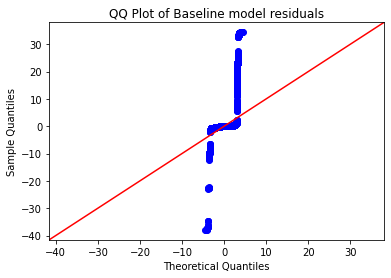

In [21]:
# To plot the residuals and the QQ plot
plot_fitted_vs_resid(baseline_model.fittedvalues, baseline_model.resid, "Baseline")
plot_qq(baseline_model.resid, "Baseline")

Looking into the above graphs the  residual are not statistically independent 
and homoscedasicity, plus the residuals are not normal

In [22]:
# function to augment the dataframe columns 
def augmented_dataframe(dataframe, response_col_name):
  augmented_df = dataframe

  ## Drop the response_variable from the augmented dataframe (we'll add it back in later)
  augmented_df = augmented_df.drop(response_col_name, axis=1)

  for col in augmented_df.columns:
    augmented_df[col+str(2)] = augmented_df[col] ** 2
    augmented_df[col+str(3)] = augmented_df[col] ** 3

  ## Add response_col_name from dataframe back into augmented_df
  augmented_df["prestg10"] = dataframe["prestg10"] 

  return augmented_df


# function to prune the model with unnecessary features
def prune_models(dataframe, response_col_name):

  ## Define the first part of our formula string 
  init_formula_string = response_col_name + " ~ "
    
    ### Assign cols_no_response to the list of the dataframe columns
  cols_no_response = dataframe.columns.tolist()
    ### <Remove> the response column name
  cols_no_response.remove(response_col_name)
    ### <Join> the string (using ' + ') as the join seperator
  rest_of_formula_string = " + ".join(cols_no_response)
    
    ## Concat the two strings together (in a new variable) to obtain our full formula string 
  formula_string = init_formula_string + rest_of_formula_string

    ## Fit the initial model variation 
  model_init = smf.ols(formula_string, data=dataframe).fit()
    
    ## Assign a p-values variable 
  pvalues = model_init.pvalues
    
    ## Find the variable with the highest p-value 
  max_p = pvalues.idxmax()
    
    ## Define our alpha threshhold at 0.05 
  alpha = 0.05
    
    # With our alpha defined, we need to perform the following steps:
    # <While> loop over our p-values with the condition that the max value is above our alpha threshold 
    # Identify the variable with the maximum p-value 
    # Drop this variable from our cols_no_response list 
    # Create a new formula string 
    # Fit the new model 
    # Re-declare our p-values variable 
    # <Drop> the Intercept attribute 
    # Once our while loop breaks, let's return the model 
    ## Implement the above instructions
    
  while pvalues.max() > alpha:

    max_p = pvalues.idxmax()
    cols_no_response.remove(max_p)
    
    rest_of_formula_string = " + ".join(cols_no_response)
    formula_string = init_formula_string + rest_of_formula_string
        
    model = smf.ols(formula_string, data=dataframe).fit()
    pvalues = model.pvalues
    pvalues = pvalues.drop("Intercept")
        
  return model
    


In [23]:
# model with automatic pruning of the features 

model_with_pruned_df = prune_models(cc_train_df, "Class")
model_with_pruned_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     7718.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:39:20   Log-Likelihood:             4.2092e+05
No. Observations:              198736   AIC:                        -8.418e+05
Df Residuals:                  198707   BIC:                        -8.415e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0013      0.000      6.567      0.000       0.001       0.002
Time       -4.493e-09   1.89e-09     -2.382      0.017   -8.19e-09   -7.95e-10
V1            -0.0019   3.85e-05    -49.655      0.000      -0.002      -0.002
V2             0.0032   6.36e-05     49.663      0.000       0.003       0.003
V3            -0.0052    5.5e-05    -94.550      0.000      -0.005      -0.005
V4             0.0039   4.78e-05     80.671      0.000       0.004       0.004
V5            -0.0022    6.5e-05    -34.429      0.000      -0.002      -0.002
V6            -0.0019   5.54e-05    -33.632      0.000      -0.002      -0.002
V7            -0.0072   7.42e-05    -97.615      0.000      -0.007      -0.007
V8             0.0010   5.86e-05     17.493      0.000       0.001       0.001
V9            -0.0037   5.98e-05    -62.506      0.000      -0.004      -0.004
V10           -0.0084   6.21e-05   -134.906      0.000      -0.009      -0.008
V11            0.0065   6.76e-05     96.286      0.000       0.006       0.007
V12           -0.0112   6.64e-05   -168.872      0.000      -0.011      -0.011
V13           -0.0002   6.59e-05     -3.692      0.000      -0.000      -0.000
V14           -0.0137   6.91e-05   -198.316      0.000      -0.014      -0.014
V15           -0.0002   7.38e-05     -3.227      0.001      -0.000   -9.35e-05
V16           -0.0096   7.49e-05   -128.500      0.000      -0.010      -0.009
V17           -0.0166   7.79e-05   -213.537      0.000      -0.017      -0.016
V18           -0.0058   7.88e-05    -73.384      0.000      -0.006      -0.006
V19            0.0020   8.12e-05     25.136      0.000       0.002       0.002
V21            0.0016   9.58e-05     17.038      0.000       0.001       0.002
V22            0.0005   9.31e-05      5.061      0.000       0.000       0.001
V24           -0.0004      0.000     -4.049      0.000      -0.001      -0.000
V25            0.0003      0.000      2.064      0.039    1.39e-05       0.001
V26            0.0004      0.000      2.672      0.008    9.66e-05       0.001
V27            0.0017      0.000      9.858      0.000       0.001       0.002
V28            0.0011      0.000      5.116      0.000       0.001       0.002
Amount      1.023e-05   6.11e-07     16.732      0.000    9.03e-06    1.14e-05
==============================================================================
Omnibus:                   409371.815   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5658029975.958
Skew:                          16.884   Prob(JB):                         0.00
Kurtosis:                     828.919   Cond. No.                     3.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [ ]:
# augmentation and automatic pruning of the features
augmented_test_df = augmented_dataframe(cc_train_df, "Class")

model_with_pruned_df = prune_models(augmented_test_df, "Class")
model_with_pruned_df.summary()